In [2]:
#Importing necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load the Netflix data into a DataFrame
netflix_data = pd.read_csv("netflix_titles.csv")

In [4]:
# Display the first few rows of the dataset
print(netflix_data.head())

# Check for missing values
print(netflix_data.isnull().sum())

# Get summary statistics
print(netflix_data.describe())


    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

In [5]:
# Drop rows with missing values
netflix_data.dropna(inplace=True)


In [6]:
# Convert 'date_added' column to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])


In [7]:
# Example: Convert text to lowercase
netflix_data['description'] = netflix_data['description'].str.lower()

# Feature Engineering

In [8]:
# Extract year and month from 'date_added'
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month

In [9]:
# Saving cleaned data to a new CSV file
netflix_data.to_csv("cleaned_netflix_data.csv", index=False)


## Explarotary Data Analysis

In [10]:
# Load the cleaned Netflix data
cleaned_data = pd.read_csv("cleaned_netflix_data.csv")

In [11]:
# Display summary statistics
summary_stats = cleaned_data.describe()
print(summary_stats)


            show_id  release_year   year_added  month_added
count  3.774000e+03   3774.000000  3774.000000  3774.000000
mean   7.510908e+07   2012.087440  2018.012454     6.726815
std    1.341114e+07      9.566944     1.212884     3.667008
min    2.477470e+05   1942.000000  2008.000000     1.000000
25%    7.027581e+07   2011.000000  2017.000000     3.000000
50%    8.014732e+07   2016.000000  2018.000000     7.000000
75%    8.024067e+07   2017.000000  2019.000000    10.000000
max    8.123573e+07   2020.000000  2020.000000    12.000000


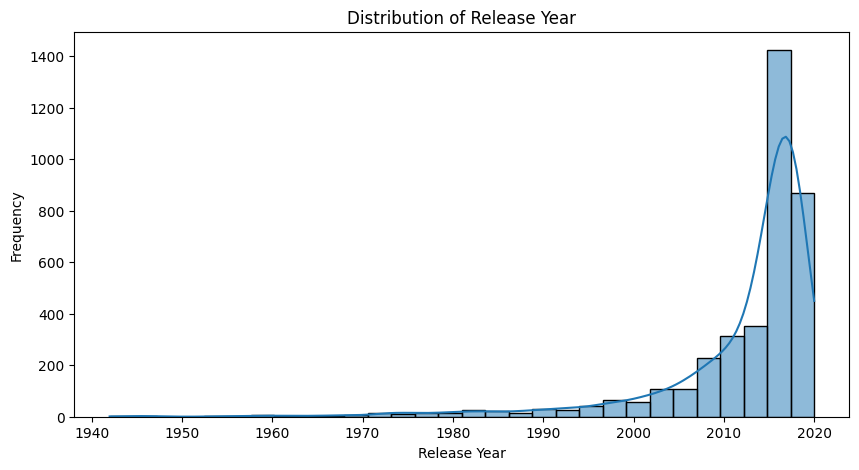

In [12]:
#Histogram of release year
plt.figure(figsize=(10, 5))
sns.histplot(data=cleaned_data, x='release_year', bins=30, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Year')
plt.show()

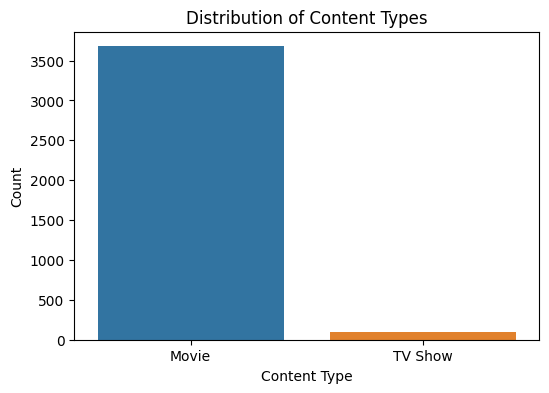

In [13]:
#Count plot of content types (Movie vs. TV Show)
plt.figure(figsize=(6, 4))
sns.countplot(data=cleaned_data, x='type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()

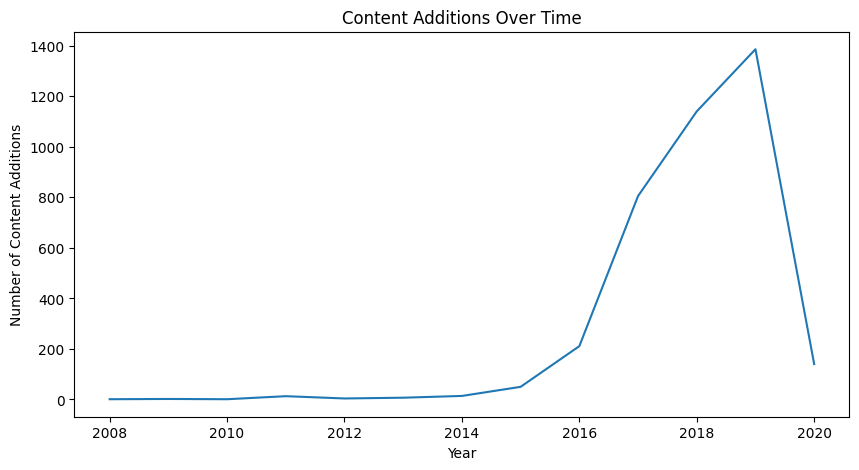

In [14]:
#Time series plot of content additions by year
plt.figure(figsize=(10, 5))
content_by_year = cleaned_data['year_added'].value_counts().sort_index()
sns.lineplot(data=content_by_year, x=content_by_year.index, y=content_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Content Additions')
plt.title('Content Additions Over Time')
plt.show()

<ipython-input-15-a4bcf519881d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



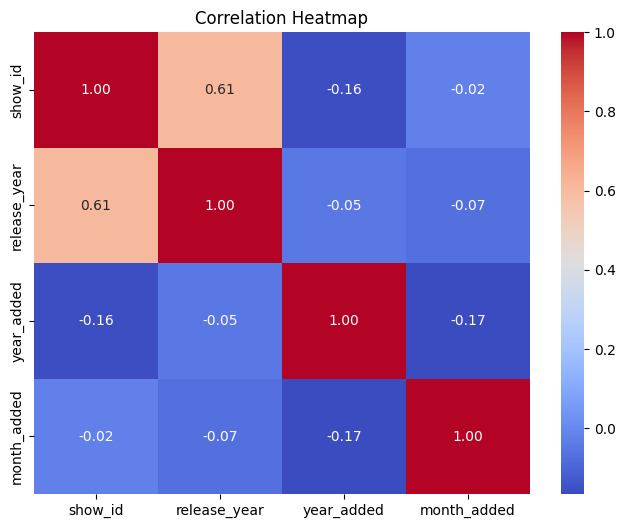

In [15]:
#Correlation heatmap
corr_matrix = cleaned_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Word cloud of movie descriptions**

In [16]:
from wordcloud import WordCloud

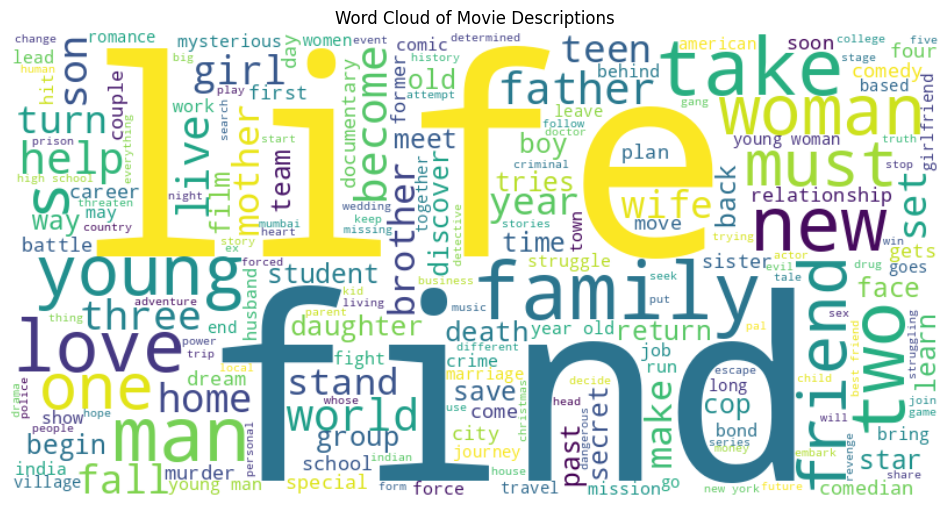

In [17]:


plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_data['description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

# Content Popularity Prediction

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
df = cleaned_data

In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",before planning an awesome wedding for his gra...,2019,9
1,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,when nerdy high schooler dani finally attracts...,2017,9
2,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","in a dystopian future, an insurance adjuster f...",2017,9
3,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,fabrizio copano takes audience participation t...,2017,9
4,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",a struggling couple can't believe their luck w...,2017,9


In [26]:
# Select features and target variable
X = cleaned_data[['release_year']]
y = cleaned_data['year_added']

In [28]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Model Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
#Model evaluation

y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 1.679650241484456
R-squared (R2): 0.0014011167224207144


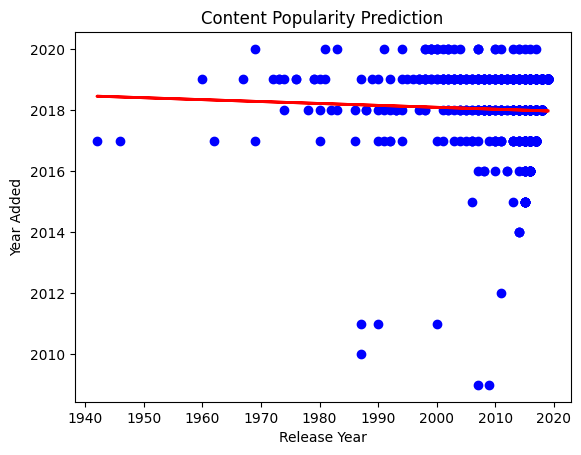

In [32]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.title('Content Popularity Prediction')
plt.show()


## Time series Analysis

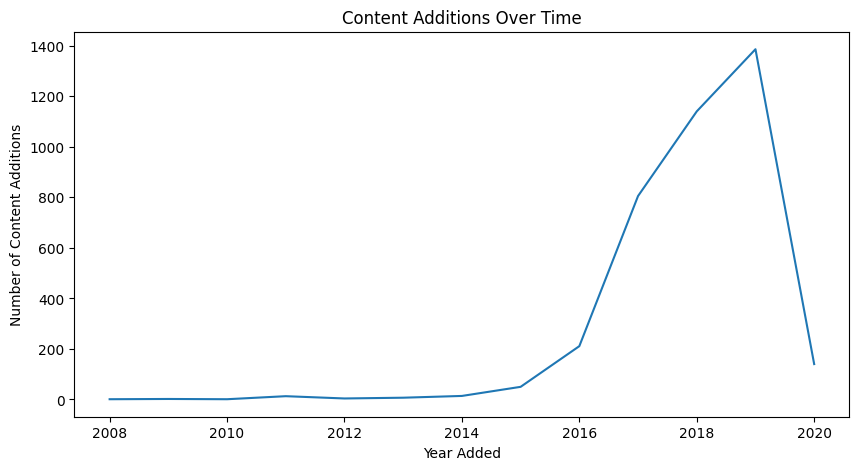

In [33]:
# Group the data by year_added and count the number of content additions each year
content_by_year = cleaned_data['year_added'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=content_by_year, x=content_by_year.index, y=content_by_year.values)
plt.xlabel('Year Added')
plt.ylabel('Number of Content Additions')
plt.title('Content Additions Over Time')
plt.show()


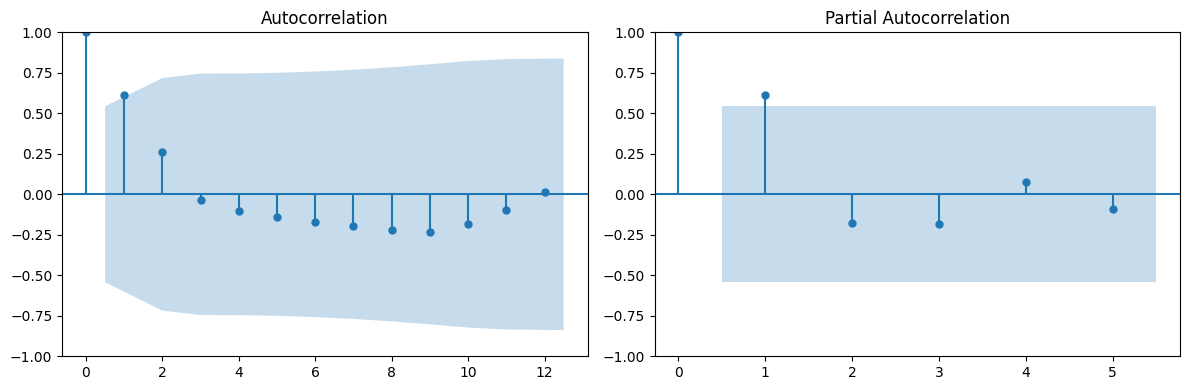

In [38]:
#AutoCorrelation and Partial AutoCorrelation (ACF and PACF) Plots (Optional):

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
plot_acf(content_by_year, ax=ax1, lags=min(len(content_by_year) - 1, 40))

# PACF plot
ax2 = plt.subplot(122)
plot_pacf(content_by_year, ax=ax2, lags=min(len(content_by_year) - 1, 5))  # Reduce the number of lags here

plt.tight_layout()
plt.show()




In [39]:
#Calculate content similarity to find related movies or TV shows based on various factors, such as cast, director, and genre.

cleaned_data['combined_features'] = cleaned_data['cast'] + ' ' + cleaned_data['director'] + ' ' + cleaned_data['listed_in']


In [42]:
#vectorizing the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(cleaned_data['combined_features'])


In [44]:
#Calculating the cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(feature_matrix)

In [45]:
#Recommendation function
#Create a function to recommend related content based on the similarity scores.
#This function will take a content title and return a list of related content titles:

def recommend_related_content(title, cosine_sim_matrix, data):
    content_indices = data[data['title'] == title].index[0]
    similarity_scores = list(enumerate(cosine_sim_matrix[content_indices]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_related_content_indices = [i[0] for i in similarity_scores[1:11]]  # Exclude the content itself
    return data['title'].iloc[top_related_content_indices]


recommend_related_content function to find related content for a specific title. For example, to find related content for the movie "Norm of the North: King Sized Adventure":

In [46]:
related_content = recommend_related_content("Norm of the North: King Sized Adventure", cosine_sim, cleaned_data)
print(related_content)


1172    Norm of the North: Keys to the Kingdom
900                                 Holly Star
2215                Mune: Guardian of the Moon
2421                             Stuart Little
524         The Flintstones in Viva Rock Vegas
607                          Barbie: Spy Squad
1826                         What a Girl Wants
2422                           Stuart Little 2
2493                            Camp Cool Kids
604                Barbie Star Light Adventure
Name: title, dtype: object


# Anomaly Detection:

Detect unusual patterns in user behavior, content popularity, or other metrics that may require further investigation.

In [48]:
#Select Features for Anomaly Detection:

feature_to_detect_anomalies = 'release_year'

#Calculate Z-scores:
from scipy import stats
z_scores = np.abs(stats.zscore(cleaned_data[feature_to_detect_anomalies]))


In [49]:
anomaly_threshold = 3
anomalies = cleaned_data[z_scores > anomaly_threshold]
print("Anomalies:")
print(anomalies)


Anomalies:
       show_id   type                    title            director  \
111   70124316  Movie     Five Elements Ninjas          Cheh Chang   
185    1008581  Movie                  Stripes        Ivan Reitman   
219   80156941  Movie         Ek Jaan Hain Hum         Rajiv Mehra   
223   80158480  Movie              Khoon Khoon    Mohammed Hussain   
226   80158545  Movie               Manoranjan       Shammi Kapoor   
...        ...    ...                      ...                 ...   
3424  60010836  Movie                Rocky III  Sylvester Stallone   
3446  80997864  Movie     Little Dragon Maiden            Hua Shan   
3628  70059700  Movie  Eddie Murphy: Delirious        Bruce Gowers   
3731  80158482  Movie                    Elaan         K. Ramanlal   
3736  80158479  Movie                Salaakhen           A. Salaam   

                                                   cast        country  \
111   Tien-chi Cheng, Tien Hsiang Lung, Meng Lo, Mic...      Hong Kong   
